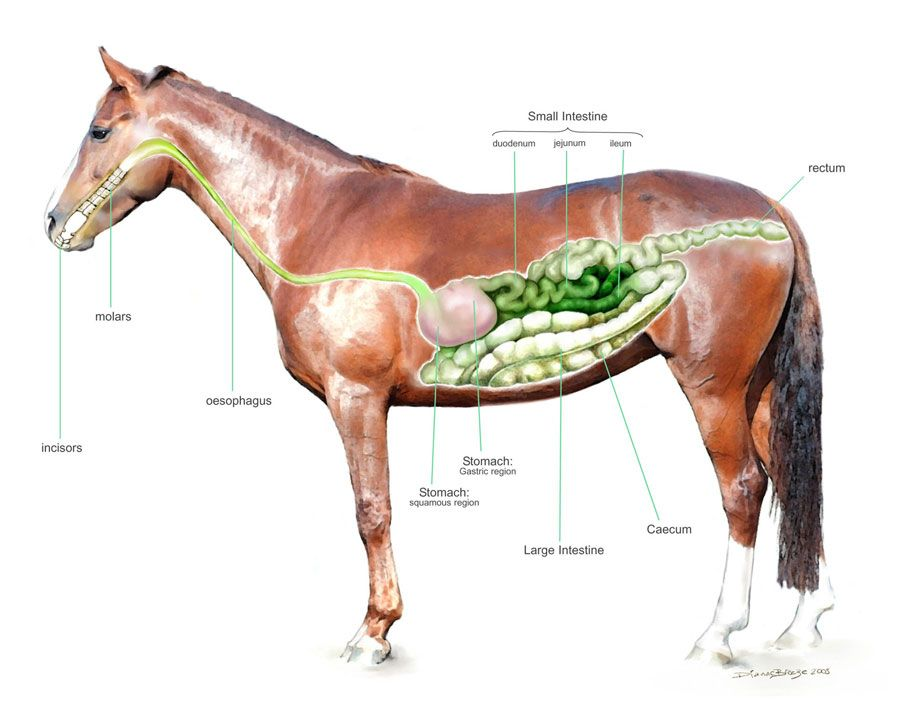

# Import important library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

# Import Data_set

In [2]:
df_test=pd.read_csv('/content/test.csv')
df_train=pd.read_csv('/content/train.csv')

In [3]:
df_train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


id: This column likely represents a unique identifier for each record in your dataset.
surgery: Indicates whether the animal underwent surgery, with values "yes" or "no".
age: Specifies the age of the animal, typically categorized as "adult" or "young".
hospital_number: Possibly a unique identifier for the hospital visit.
rectal_temp: Represents the rectal temperature of the animal.
pulse: Indicates the pulse rate of the animal.
respiratory_rate: Specifies the respiratory rate of the animal.
temp_of_extremities: Describes the temperature of the extremities, with categories such as "cool", "cold", or "normal".
peripheral_pulse: Represents the peripheral pulse status, which may include values like "reduced", "normal", etc.
mucous_membrane: Describes the mucous membrane condition, possibly with categories like "dark_cyanotic", "pale_pink", etc.
packed_cell_volume: Indicates the packed cell volume in the blood.
total_protein: Represents the total protein level in the blood.
abdomo_appearance: Describes the appearance of the abdomen, with categories like "serosanguious", "cloudy", etc.
abdomo_protein: Indicates the protein level in the abdomen.
surgical_lesion: Indicates whether a surgical lesion was observed.
lesion_1, lesion_2, lesion_3: Possibly codes or identifiers related to lesions.
cp_data: Indicates whether there is pathology data available.
outcome: Represents the outcome of the medical case, with categories like "died", "euthanized", or "lived".

In [4]:
# Checking shape
df_train.shape

(1235, 29)

In [5]:
df_test.shape

(824, 28)

In [6]:
df_train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [7]:
df_test.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,824.000000,8.240000e+02,824.000000,824.000000,824.00000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.0
mean,1646.500000,1.108357e+06,38.244539,80.229369,30.71966,4.508495,49.063350,20.796238,3.336420,3709.803398,12.391990,0.0
std,238.012605,1.555627e+06,0.785234,29.164711,17.43191,1.883464,10.450138,26.413588,1.539235,5112.931057,197.067771,0.0
min,1235.000000,5.213990e+05,36.000000,36.000000,9.00000,1.000000,23.000000,3.900000,0.100000,0.000000,0.000000,0.0
25%,1440.750000,5.287430e+05,37.800000,54.000000,18.00000,3.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.0
50%,1646.500000,5.298085e+05,38.200000,76.000000,28.00000,4.500000,48.000000,7.500000,3.300000,2209.000000,0.000000,0.0
75%,1852.250000,5.346440e+05,38.600000,100.000000,36.00000,6.500000,55.000000,8.900000,4.300000,3205.000000,0.000000,0.0
max,2058.000000,5.305129e+06,40.800000,184.000000,96.00000,7.500000,75.000000,89.000000,10.100000,31110.000000,4300.000000,0.0


In [8]:
# Checking Null Values
df_train.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [9]:
df_test.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

# EDA

In [10]:
df_train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [11]:
# Plot countplot
df_int=df_train.select_dtypes(include='int')

In [12]:
df_col=df_train.select_dtypes(include='object')

<Axes: >

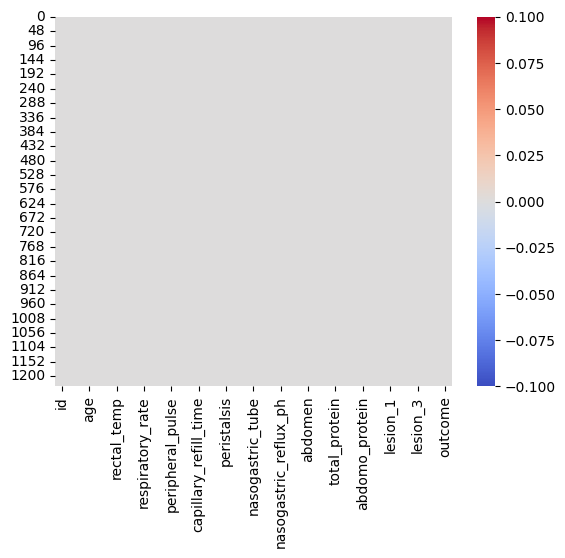

In [13]:
# Checking Null Values
sns.heatmap(df_train.isnull(),cmap='coolwarm')

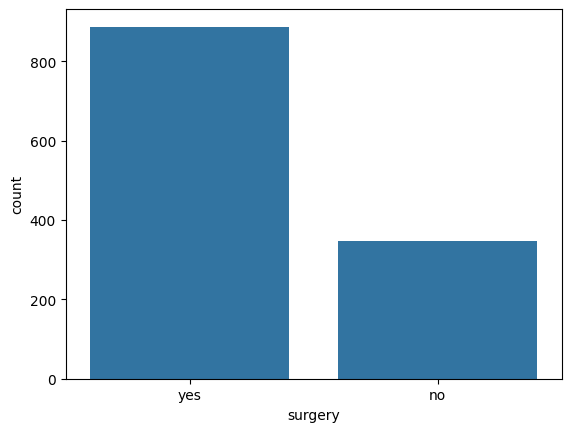

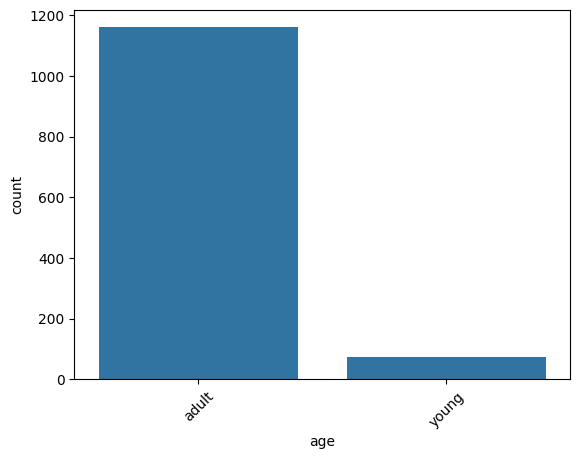

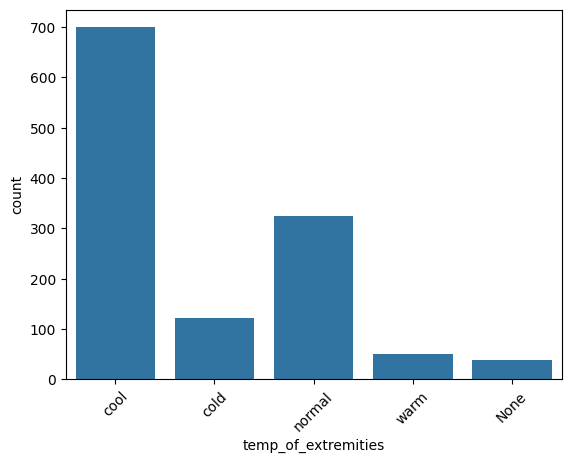

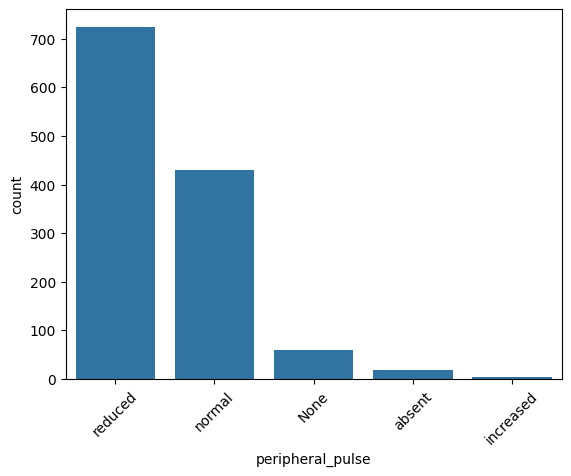

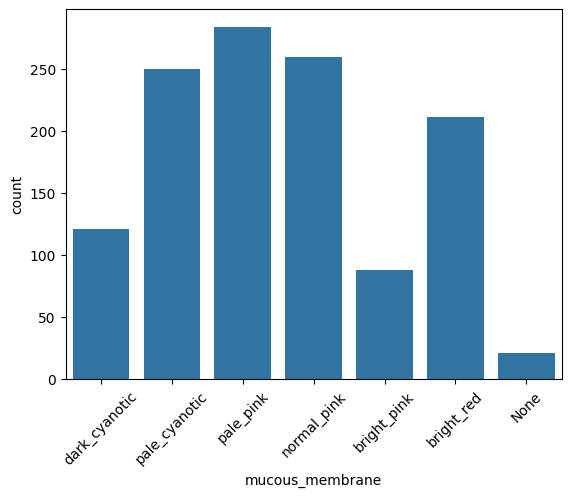

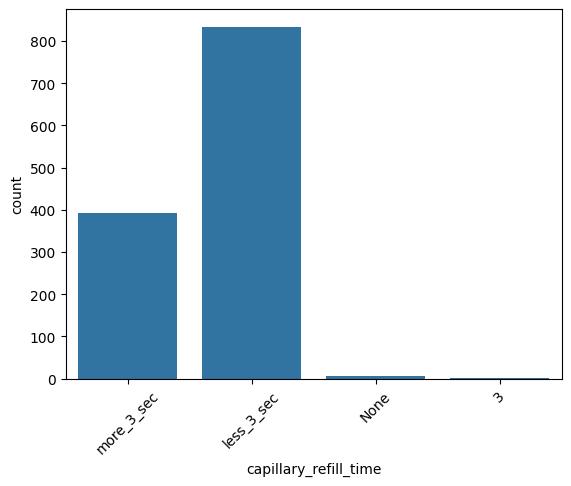

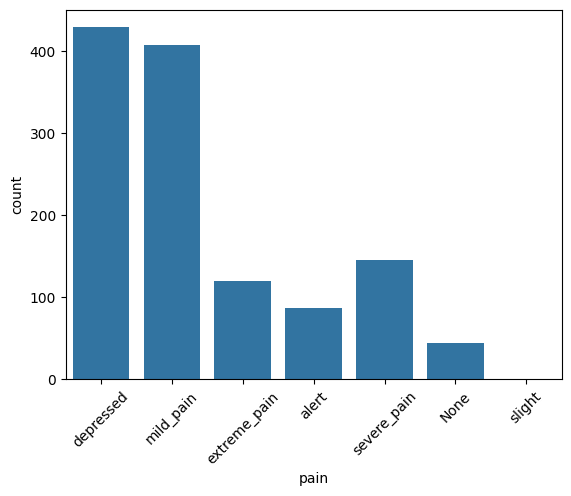

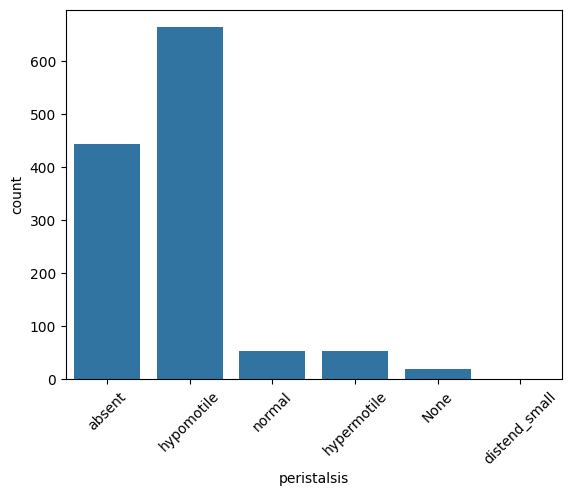

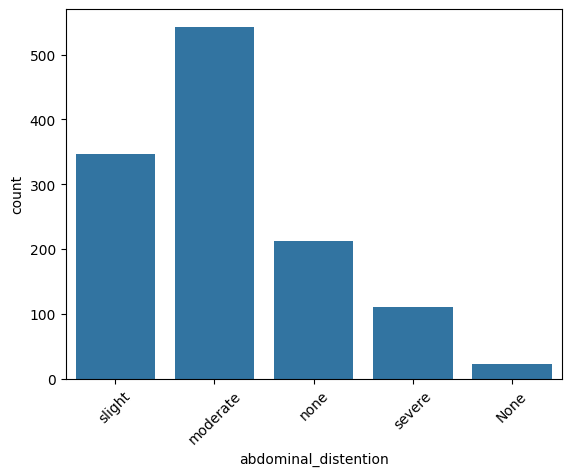

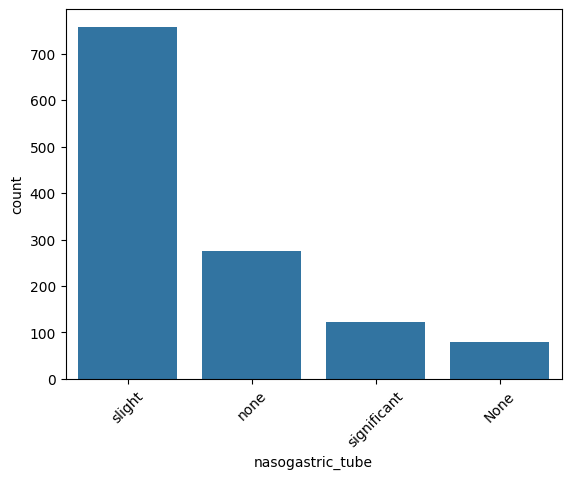

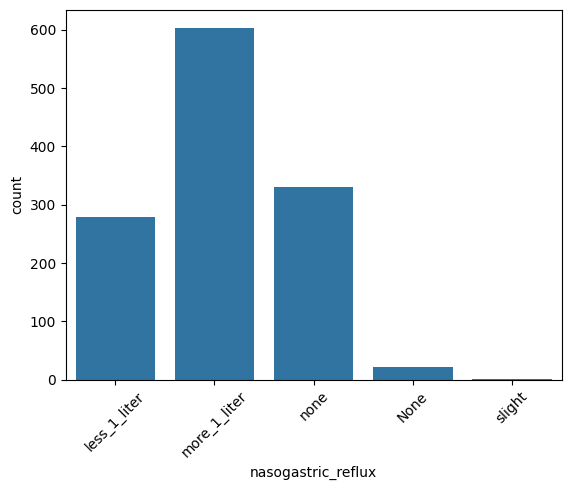

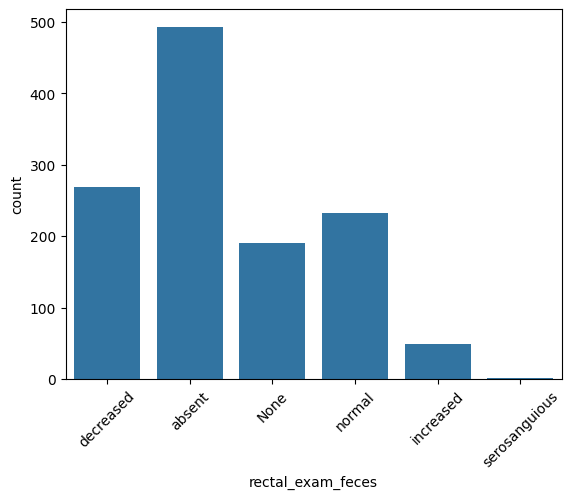

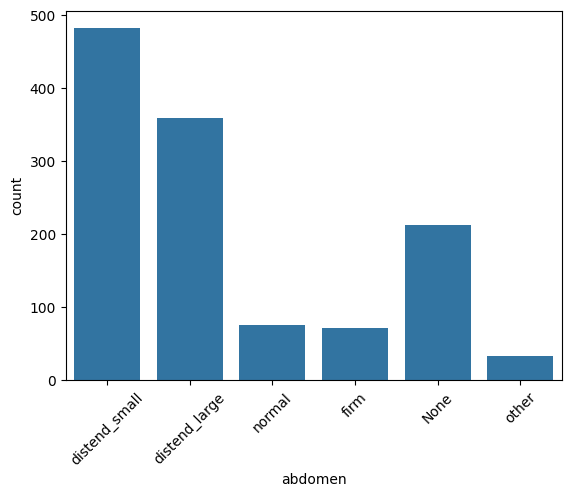

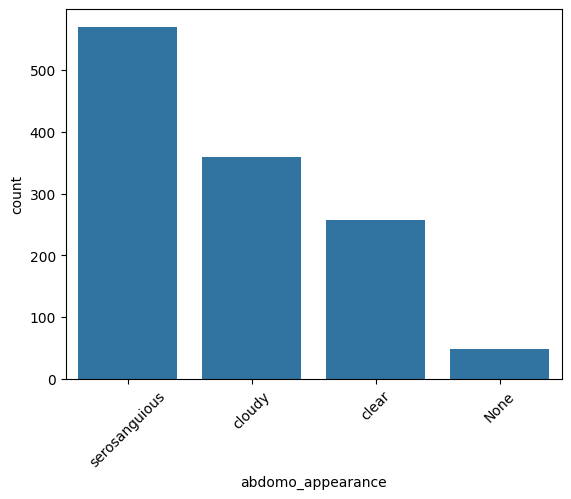

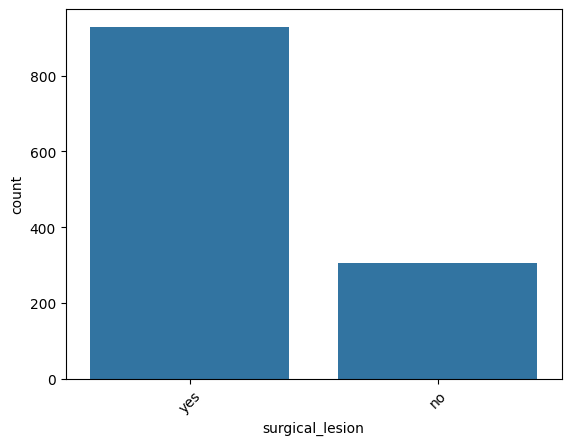

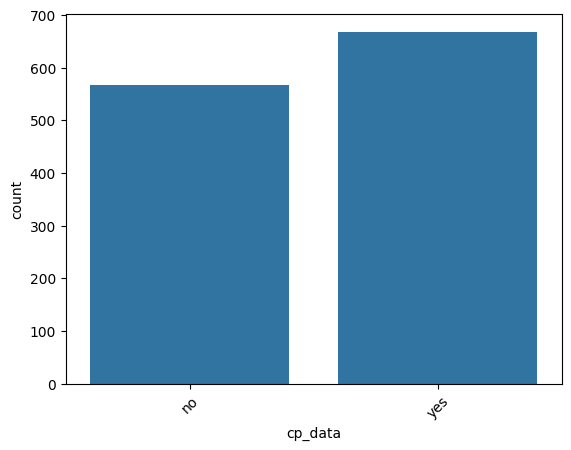

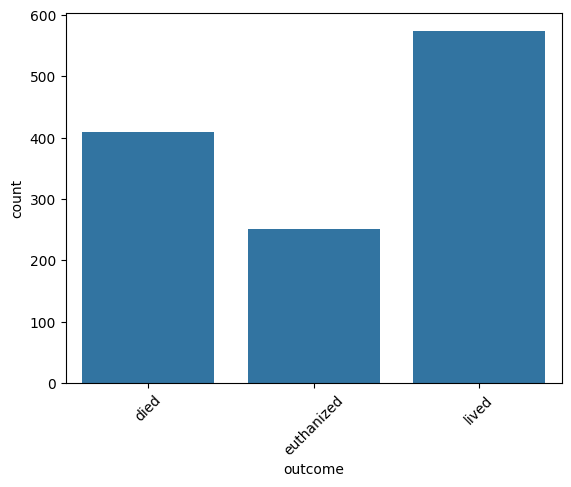

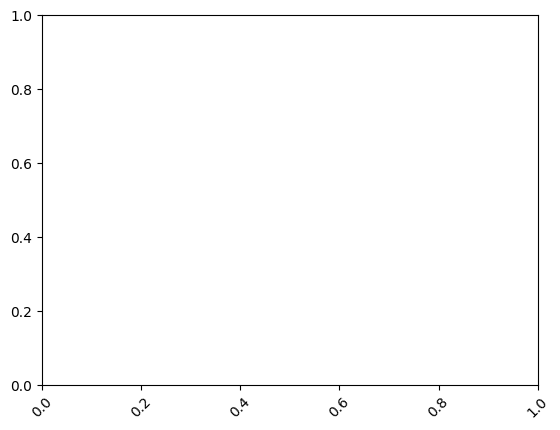

In [14]:
for i in df_col:
  sns.countplot(x=df_col[i])
  plt.show()
  plt.xticks(rotation=45)

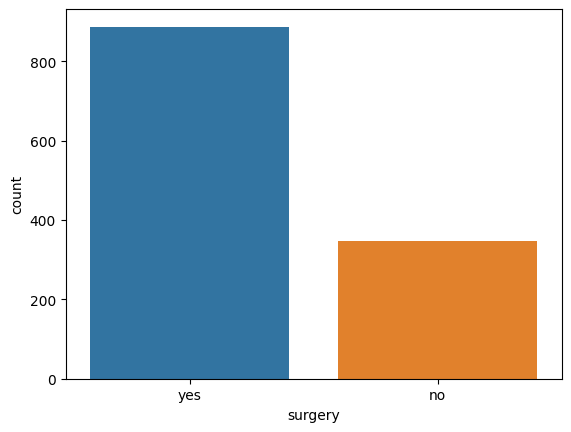

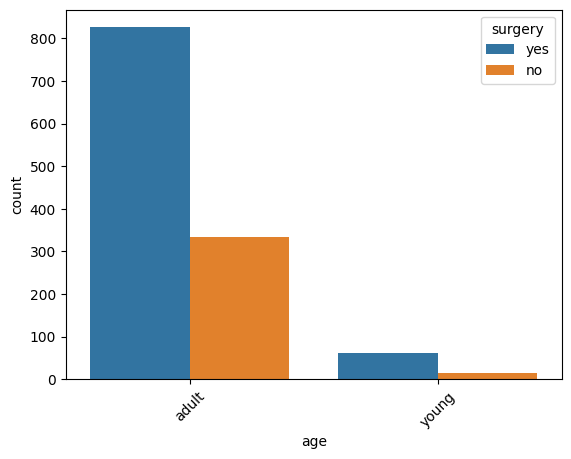

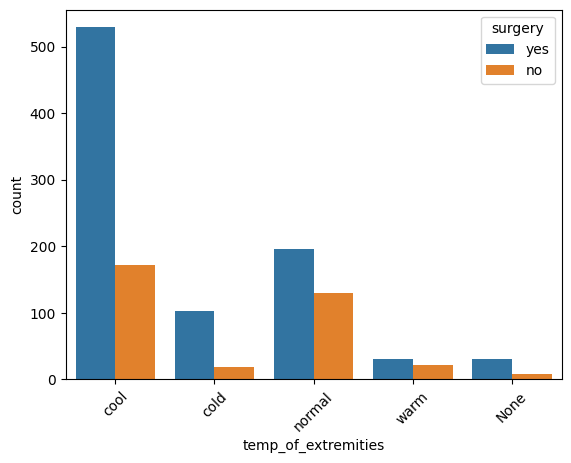

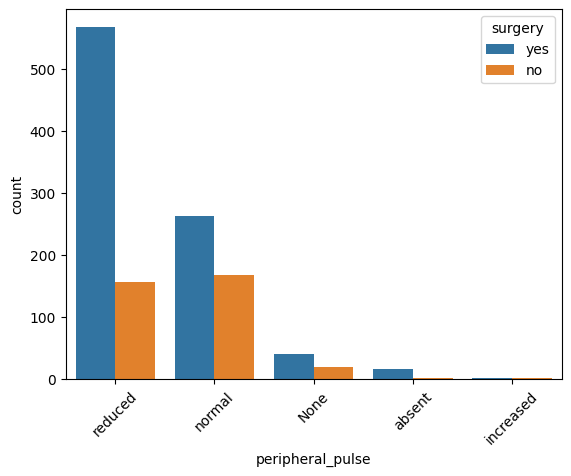

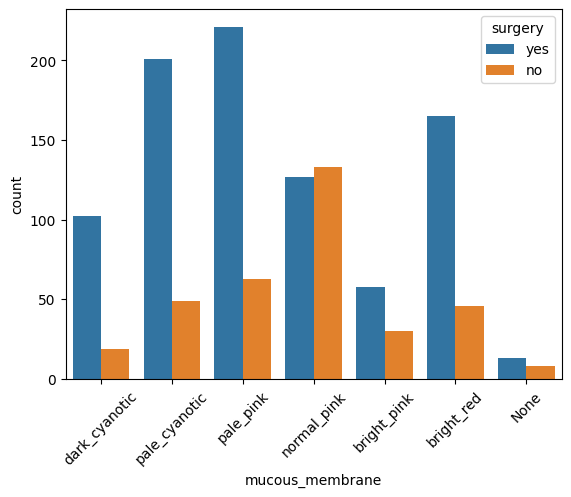

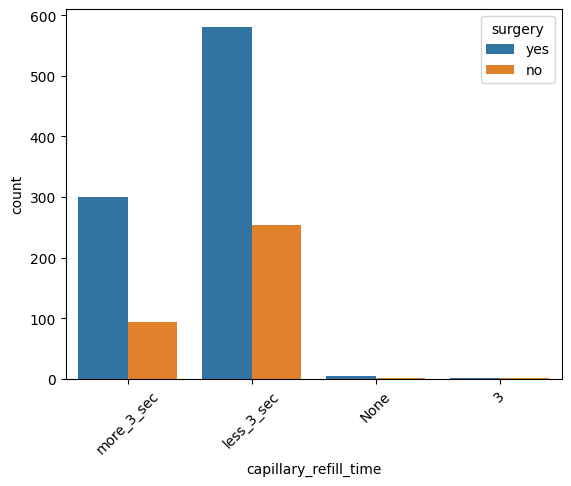

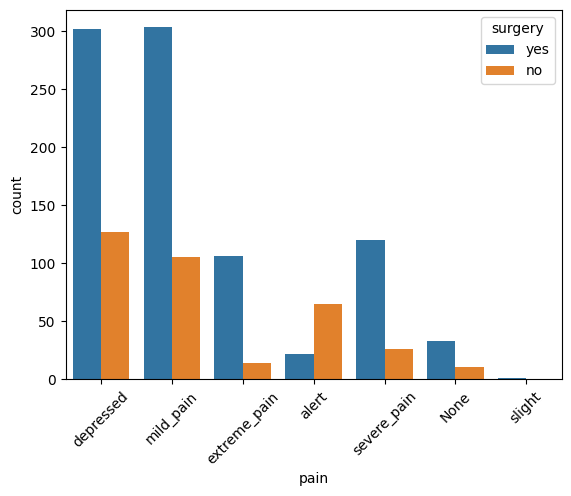

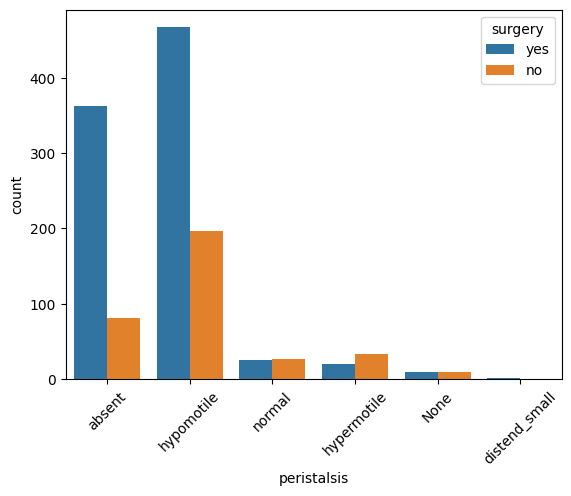

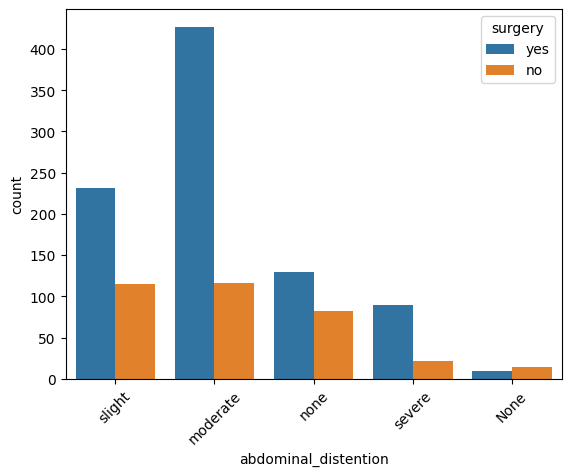

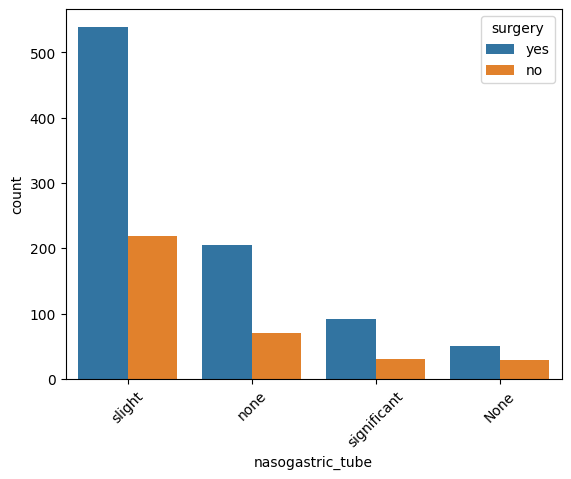

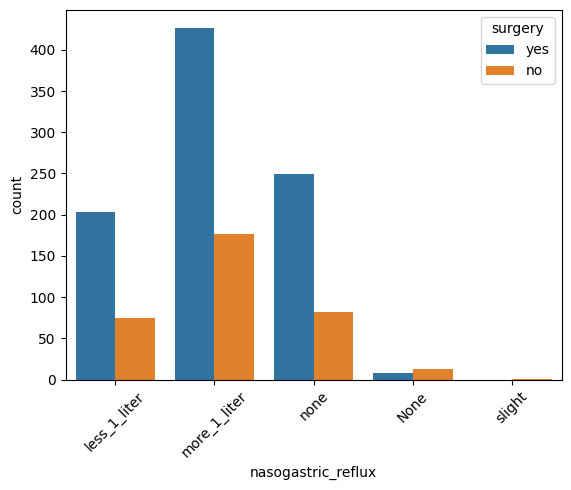

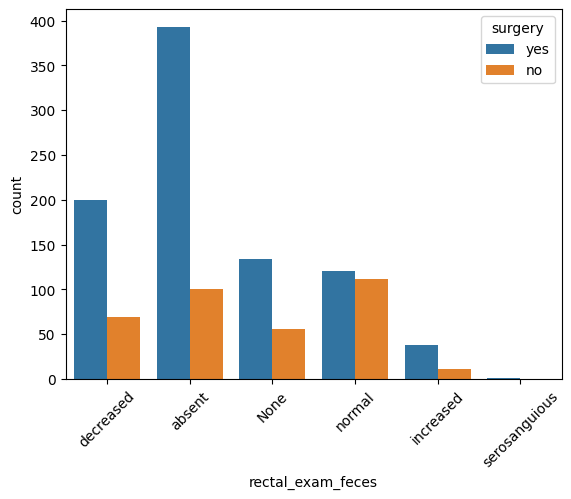

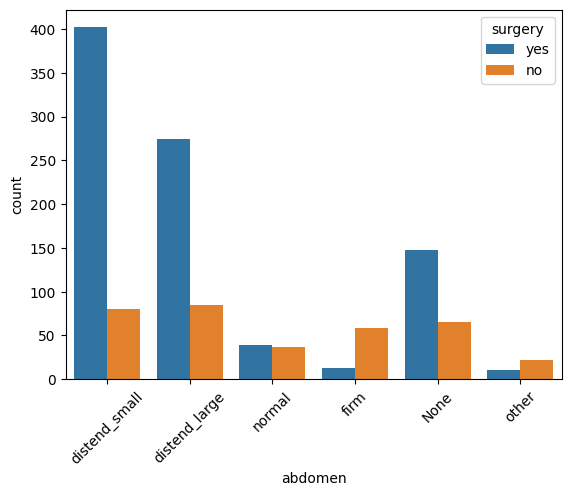

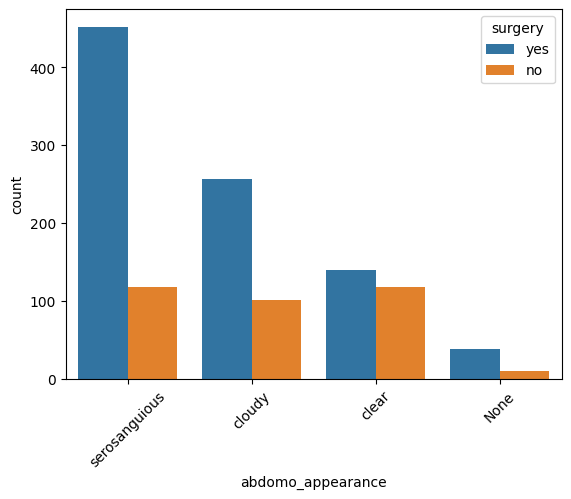

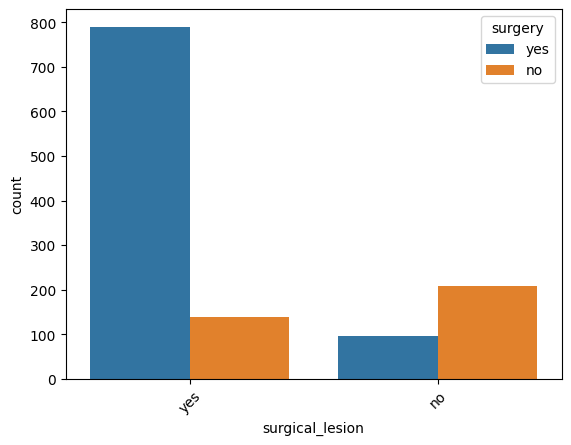

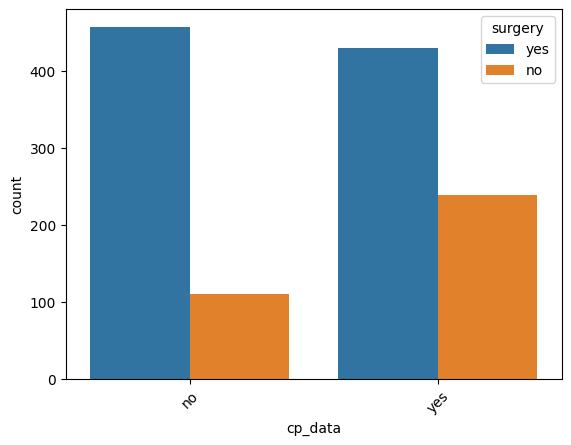

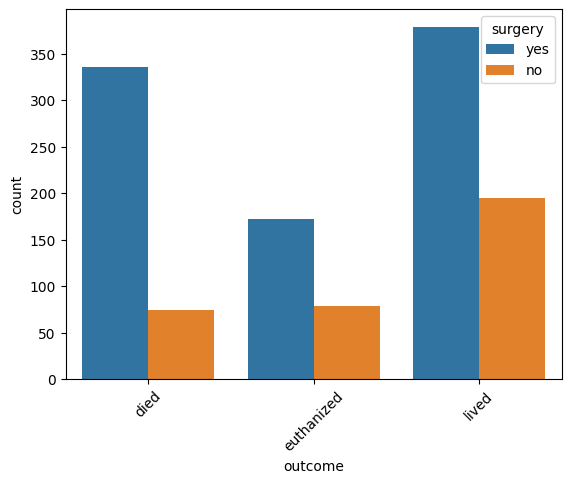

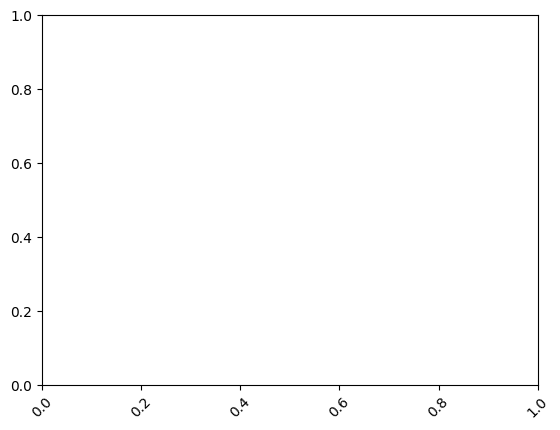

In [15]:
for i in df_col:
  sns.countplot(x=df_col[i],hue=df_col['surgery'])
  plt.show()
  plt.xticks(rotation=45)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [17]:
df_train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [18]:
# sns.pairplot(df_train)

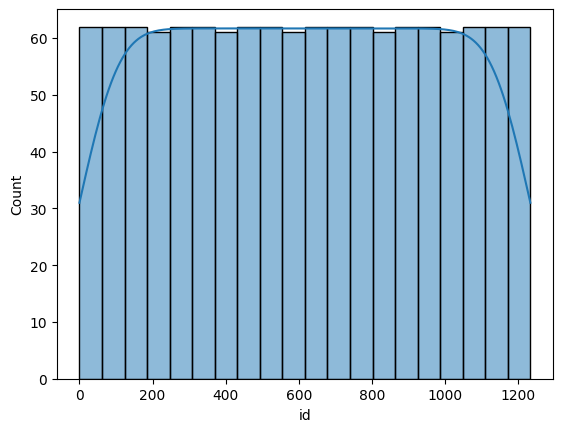

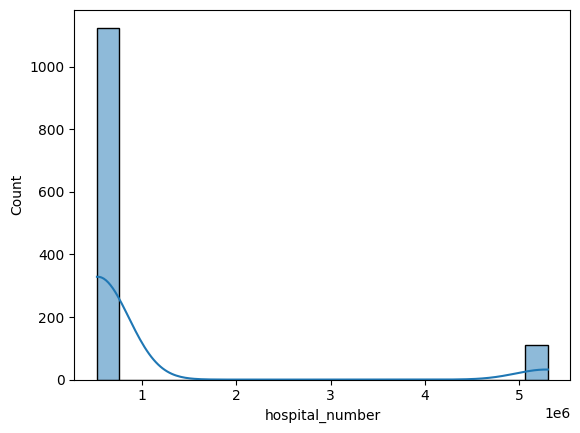

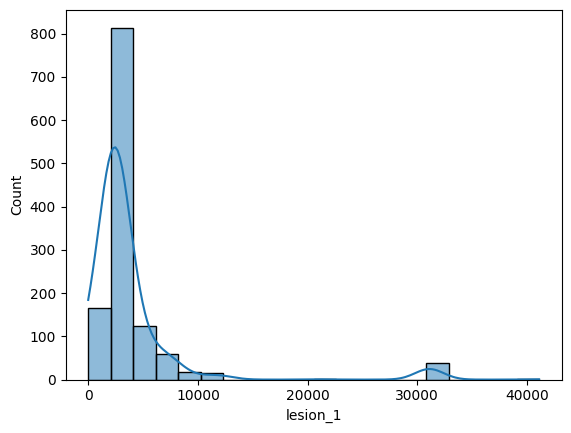

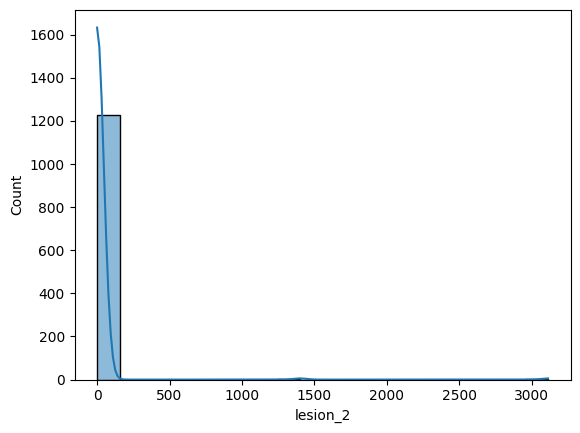

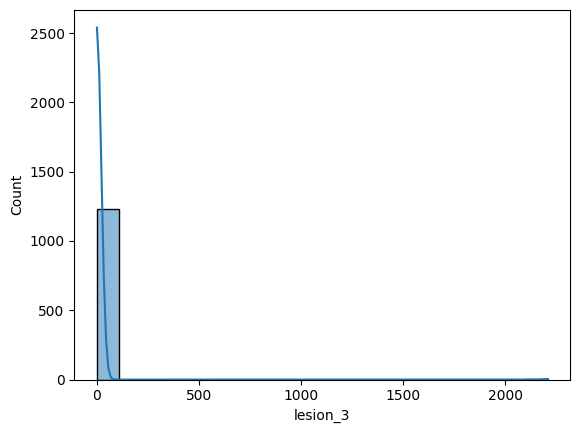

In [19]:
# Plot histplot
for i in df_int.columns:
  sns.histplot(data=df_int[i],bins=20,kde=True)
  plt.show()

<Axes: xlabel='mucous_membrane', ylabel='abdomo_appearance'>

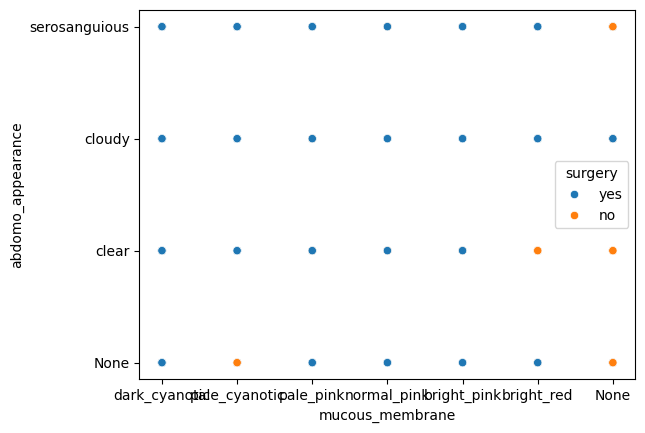

In [20]:
sns.scatterplot(x='mucous_membrane',y='abdomo_appearance',hue='surgery',data=df_train)

<Axes: xlabel='respiratory_rate', ylabel='rectal_temp'>

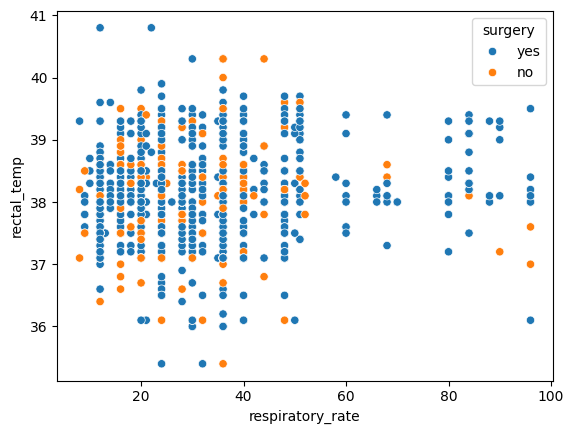

In [21]:
# ScatterPlot
sns.scatterplot(x='respiratory_rate',y='rectal_temp',hue='surgery',data=df_train)

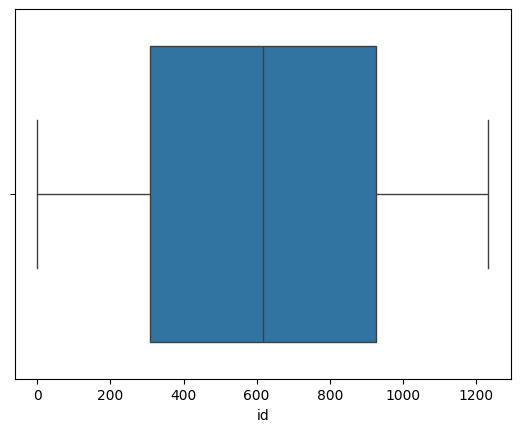

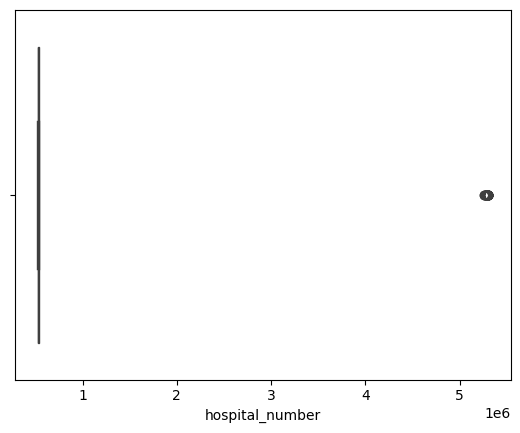

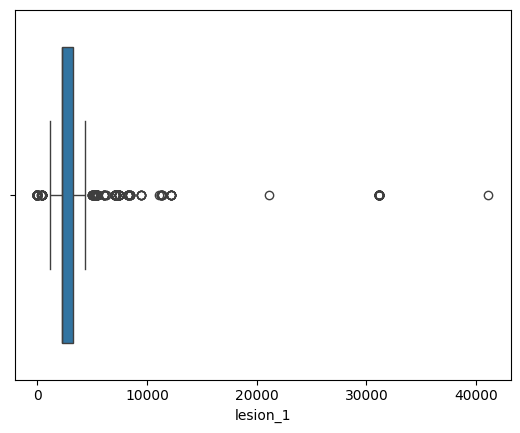

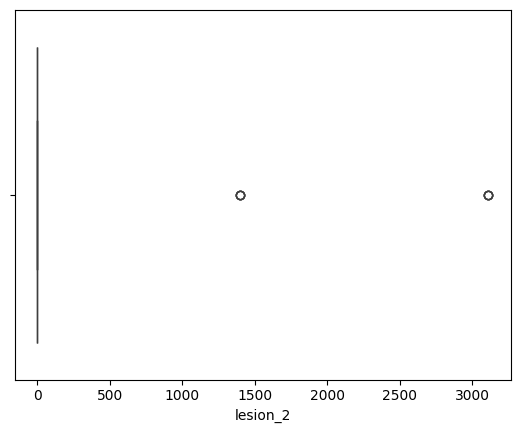

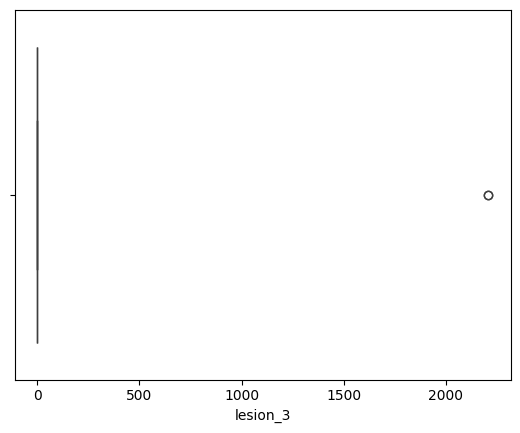

In [22]:
# Checking Outliers
for i in df_int:
  sns.boxplot(x=df_int[i])
  plt.show()

# Data preprocessing

In [23]:
df_train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [24]:
categorical=['surgery','age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
       'cp_data', 'outcome']

In [25]:
label=LabelEncoder()

In [107]:
for col in categorical:
  df_train[col]=label.fit_transform(df_train[col])
  df_train

In [28]:
# Split data
x=df_train.drop('surgery',axis=1)
y=df_train['surgery']

In [29]:
# Scaling the columns
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
pd.DataFrame(X_scaled,columns=x.columns)

,id,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,-1.730649,-0.254274,-0.313086,-0.129621,1.801773,-0.368142,-0.233804,0.617613,-0.560938,1.428043,...,0.702421,-0.483319,0.925201,0.068659,0.573922,-0.298737,-0.075465,-0.040275,-1.085417,-1.283354
1,-1.727844,-0.254274,-0.310258,-0.890705,0.289582,-1.097830,-0.233804,-0.425823,0.631417,1.428043,...,-1.576449,1.598010,0.925201,-0.812647,0.573922,-0.298921,-0.075465,-0.040275,-1.085417,-0.150443
2,-1.725039,-0.254274,-0.313226,0.124074,1.389357,-0.124913,-0.233804,0.617613,1.227595,-0.641949,...,-1.196638,-0.562072,0.925201,0.068659,0.573922,0.237648,-0.075465,-0.040275,-1.085417,0.982468
3,-1.722234,-0.254274,3.177363,-1.398095,-0.260306,-0.003299,-1.505820,0.617613,1.227595,1.428043,...,0.322609,-0.539571,-0.196117,0.383411,0.573922,-0.298921,-0.075465,-0.040275,0.921305,0.982468
4,-1.719429,-0.254274,3.204717,-0.256468,-0.947666,1.091232,1.038212,-0.425823,0.035240,-0.641949,...,-0.247108,-0.528321,-0.196117,-0.434944,-1.742397,-0.705212,-0.075465,-0.040275,0.921305,0.982468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.719429,-0.254274,-0.309218,0.377769,1.698669,1.091232,-0.233804,0.617613,1.227595,1.428043,...,0.702421,1.673013,0.925201,-0.812647,0.573922,-0.299289,-0.075465,-0.040275,-1.085417,0.982468
1231,1.722234,-0.254274,-0.314142,-0.890705,-0.672722,1.212846,-0.233804,0.617613,0.631417,-0.641949,...,-1.386544,-0.562072,0.925201,0.194560,0.573922,-0.298737,-0.075465,-0.040275,0.921305,-1.283354
1232,1.725039,3.932768,-0.313319,-0.890705,0.152110,0.604774,1.038212,0.617613,0.035240,-0.641949,...,-0.911779,-0.580823,-0.196117,2.334874,0.573922,-0.631608,-0.075465,-0.040275,0.921305,0.982468
1233,1.727844,-0.254274,-0.309559,-0.129621,-0.329042,-0.854601,1.038212,0.617613,-1.157116,-0.641949,...,0.797374,1.973025,-0.196117,-0.812647,0.573922,-0.298737,-0.075465,-0.040275,-1.085417,0.982468


In [30]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100,stratify=y)

In [31]:
from sklearn.feature_selection import RFE

In [32]:
28/3

9.333333333333334

# Model Building

In [33]:
dtc=DecisionTreeClassifier()
dtc_rf=RFE(estimator=dtc, n_features_to_select=10,step=1)
dtc_rf=dtc_rf.fit(X_train,y_train)

In [38]:
dtc_rf.feature_names_in_

array(['id', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'outcome'], dtype=object)

In [39]:
df=pd.DataFrame({'Feature':dtc_rf.feature_names_in_,'Ranking':dtc_rf.ranking_})
df[df['Ranking'] ==1]

,Feature,Ranking
0,id,1
2,hospital_number,1
3,rectal_temp,1
4,pulse,1
15,nasogastric_reflux_ph,1
18,packed_cell_volume,1
19,total_protein,1
21,abdomo_protein,1
22,surgical_lesion,1
23,lesion_1,1


In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
Y_pred_test=dtc_rf.predict(X_test)
Y_pred_train=dtc_rf.predict(X_train)

In [43]:
print('Accuracy_Train',accuracy_score(Y_pred_train,y_train))
print('Accuracy_Test',accuracy_score(Y_pred_test,y_test))

Accuracy_Train 1.0
Accuracy_Test 0.7408906882591093


In [45]:
print('confusion_matrix_Train\n',confusion_matrix(Y_pred_train,y_train))
print('confusion_matrix_Test\n',confusion_matrix(Y_pred_test,y_test))

confusion_matrix_Train
 [[278   0]
 [  0 710]]
confusion_matrix_Test
 [[ 42  36]
 [ 28 141]]


In [46]:
print('classification_report_Train',classification_report(Y_pred_train,y_train))
print('classification_report_Test',classification_report(Y_pred_test,y_test))

classification_report_Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       710

    accuracy                           1.00       988
   macro avg       1.00      1.00      1.00       988
weighted avg       1.00      1.00      1.00       988

classification_report_Test               precision    recall  f1-score   support

           0       0.60      0.54      0.57        78
           1       0.80      0.83      0.82       169

    accuracy                           0.74       247
   macro avg       0.70      0.69      0.69       247
weighted avg       0.73      0.74      0.74       247



In [48]:
# Using Smote sampling
from imblearn.over_sampling import SMOTE

In [49]:
smote=SMOTE()
X_res,y_res=smote.fit_resample(X_train,y_train)

In [51]:
y_res.value_counts()

0    710
1    710
Name: surgery, dtype: int64

In [62]:
dtc=DecisionTreeClassifier()
dtc_rf=RFE(estimator=dtc, n_features_to_select=10,step=1)
dtc_rf=dtc_rf.fit(X_res,y_res)
final_dtc = dtc_rf.estimator_
final_dtc

DecisionTreeClassifier()

[Text(0.426953125, 0.975, 'x[8] <= 0.5\ngini = 0.5\nsamples = 1420\nvalue = [710, 710]'),
 Text(0.21255605381165918, 0.925, 'x[6] <= 74.781\ngini = 0.226\nsamples = 592\nvalue = [515, 77]'),
 Text(0.15336322869955157, 0.875, 'x[4] <= 47.943\ngini = 0.171\nsamples = 550\nvalue = [498, 52]'),
 Text(0.10672645739910314, 0.825, 'x[7] <= 1.021\ngini = 0.141\nsamples = 524\nvalue = [484, 40]'),
 Text(0.07802690582959641, 0.775, 'x[3] <= 65.0\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.06367713004484304, 0.725, 'x[0] <= 924.0\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.05650224215246637, 0.675, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.07085201793721974, 0.675, 'x[2] <= 38.2\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.06367713004484304, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07802690582959641, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.09237668161434978, 0.725, 'x[1] <= 530502.0\ngini = 0.278\nsamples = 6\nvalue =

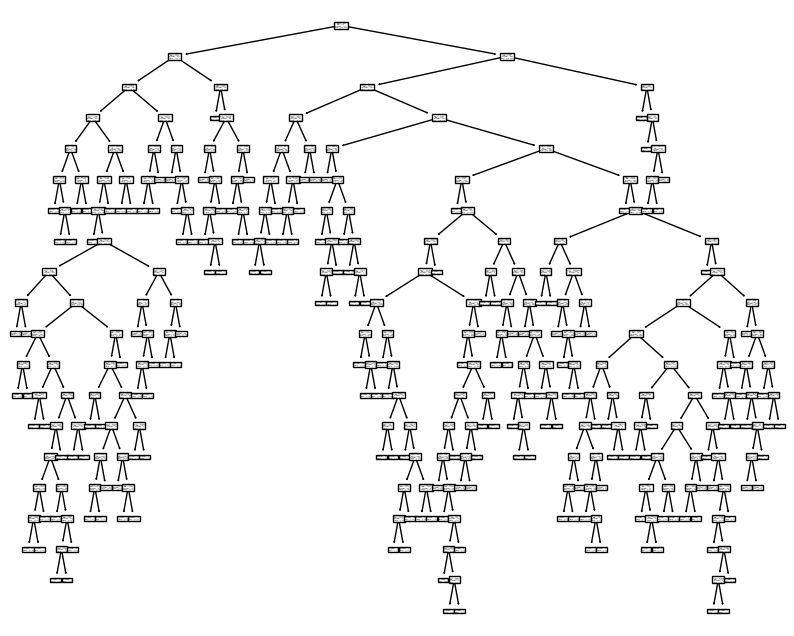

In [63]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(final_dtc)

In [53]:
Y_pred_test=dtc_rf.predict(X_test)
Y_pred_train=dtc_rf.predict(X_res)

In [54]:
print('Accuracy_Train',accuracy_score(Y_pred_train,y_res))
print('Accuracy_Test',accuracy_score(Y_pred_test,y_test))

Accuracy_Train 1.0
Accuracy_Test 0.8097165991902834


In [55]:
print('classification_report_Train',classification_report(Y_pred_train,y_res))
print('classification_report_Test',classification_report(Y_pred_test,y_test))

classification_report_Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       1.00      1.00      1.00       710

    accuracy                           1.00      1420
   macro avg       1.00      1.00      1.00      1420
weighted avg       1.00      1.00      1.00      1420

classification_report_Test               precision    recall  f1-score   support

           0       0.71      0.65      0.68        77
           1       0.85      0.88      0.86       170

    accuracy                           0.81       247
   macro avg       0.78      0.77      0.77       247
weighted avg       0.81      0.81      0.81       247



In [96]:
RF=RandomForestClassifier()
rf_rf=RF.fit(X_res,y_res)

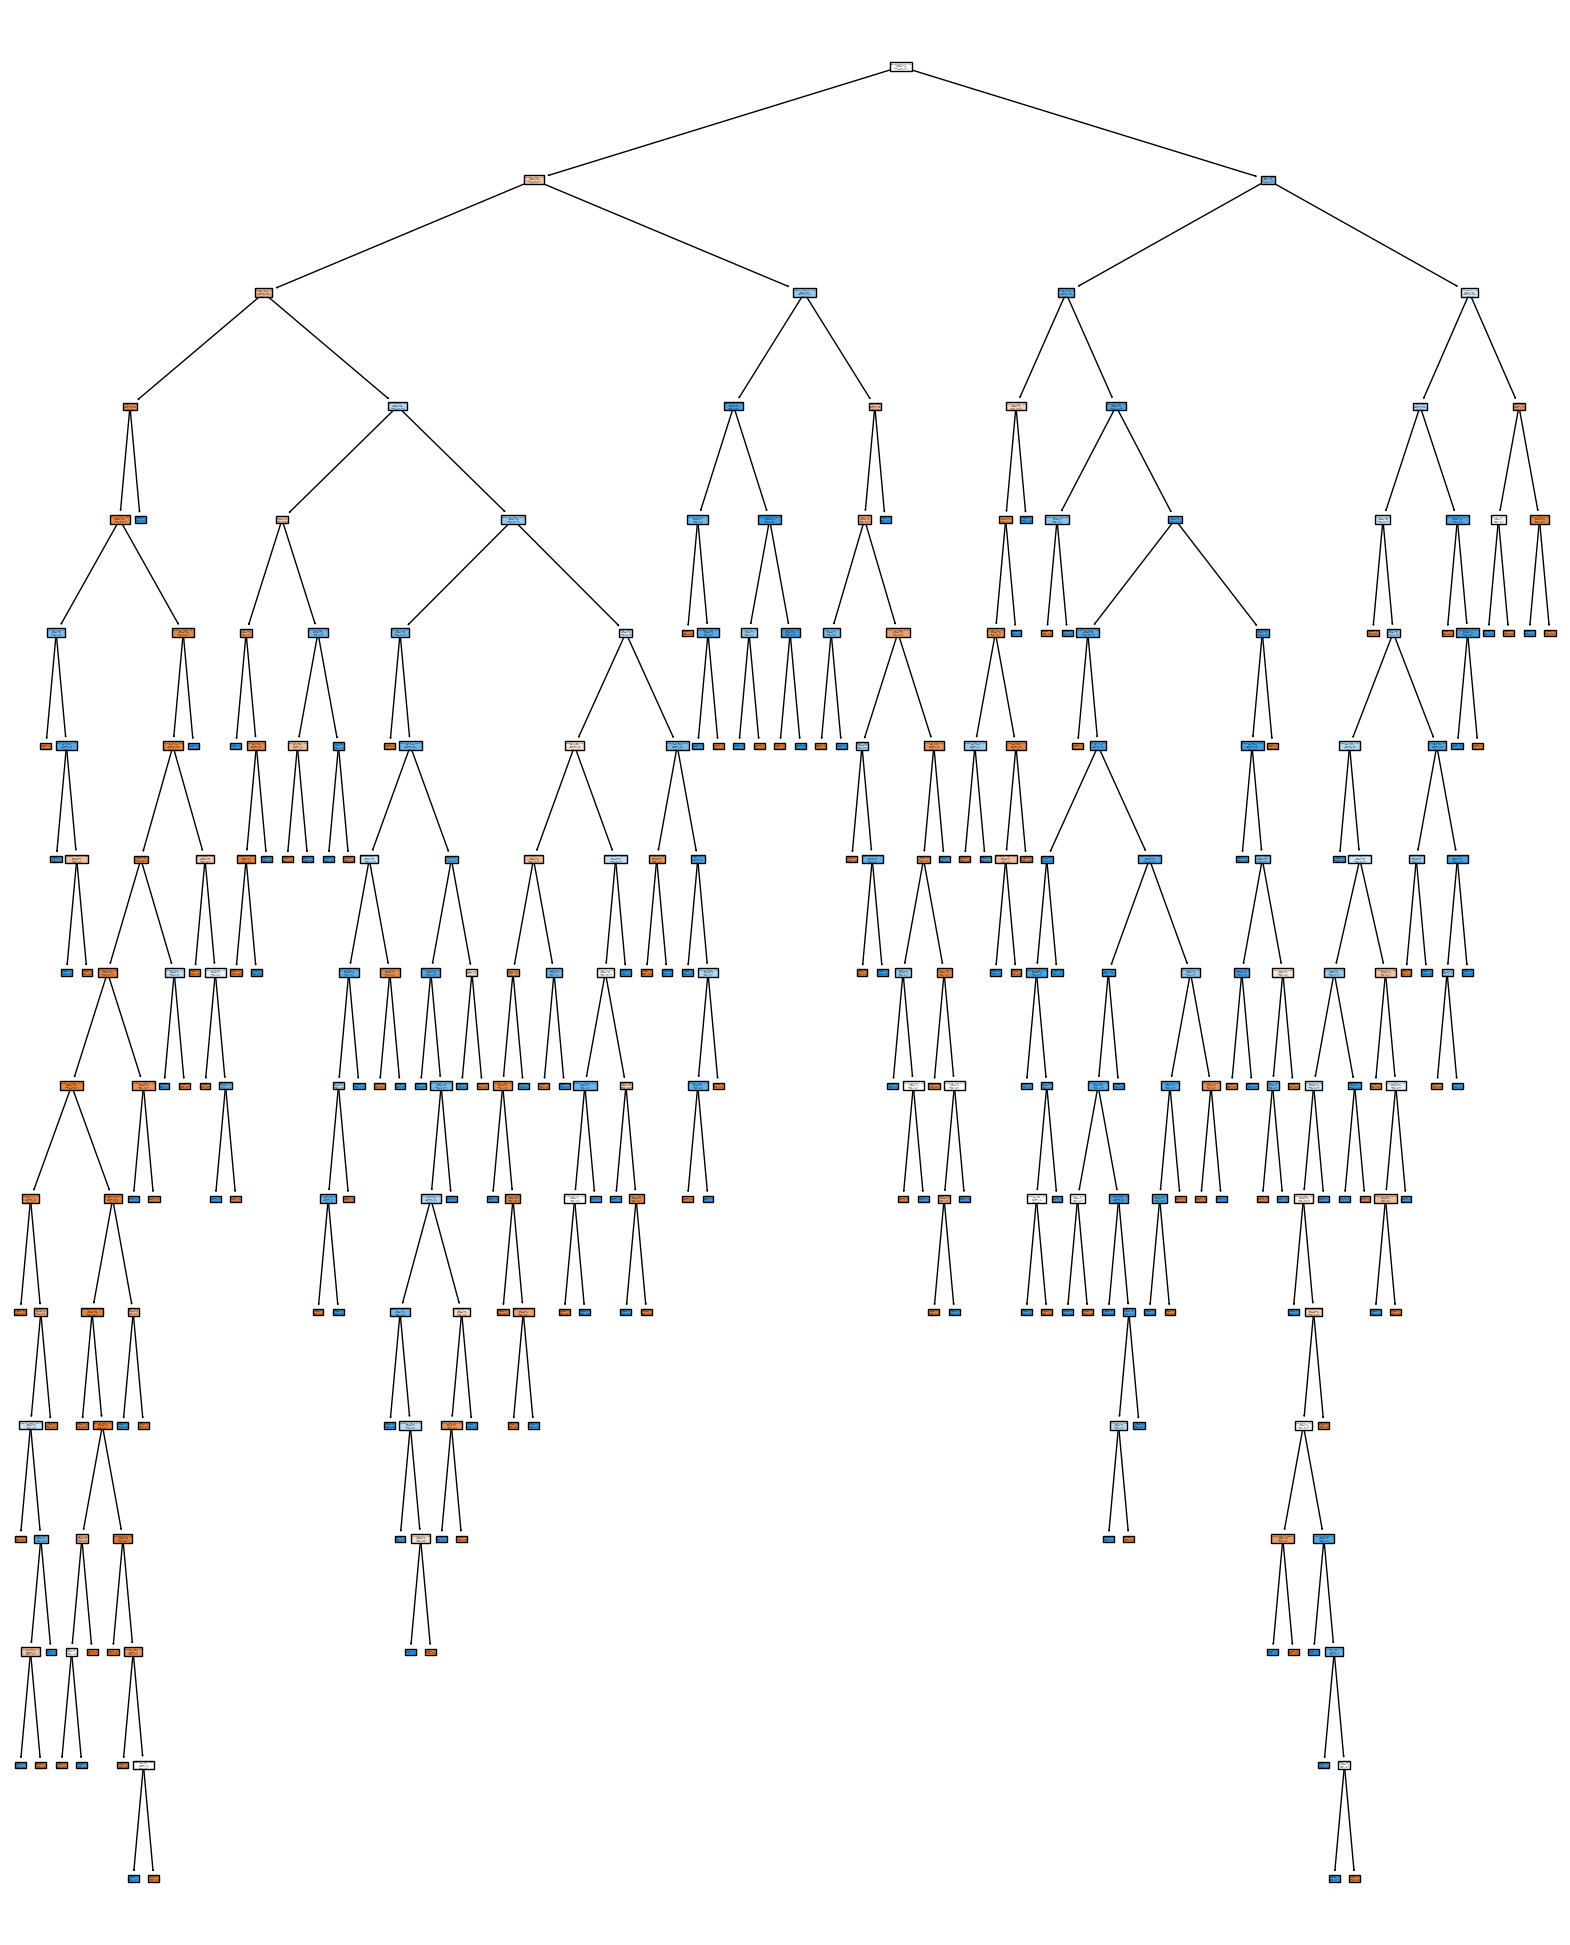

In [117]:
plt.figure(figsize=(20,25))
plot_tree(rf_rf.estimators_[0], feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [88]:
RF=RandomForestClassifier()
rf_rf=RFE(estimator=RF,n_features_to_select=10,step=1)
rf_rf=rf_rf.fit(X_res,y_res)

In [89]:
Y_pred_test=rf_rf.predict(X_test)
Y_pred_train=rf_rf.predict(X_res)

In [90]:
print('Accuracy_Train',accuracy_score(Y_pred_train,y_res))
print('Accuracy_Test',accuracy_score(Y_pred_test,y_test))

Accuracy_Train 1.0
Accuracy_Test 0.8380566801619433


In [91]:
print('classification_report_Train',classification_report(Y_pred_train,y_res))
print('classification_report_Test',classification_report(Y_pred_test,y_test))

classification_report_Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       1.00      1.00      1.00       710

    accuracy                           1.00      1420
   macro avg       1.00      1.00      1.00      1420
weighted avg       1.00      1.00      1.00      1420

classification_report_Test               precision    recall  f1-score   support

           0       0.66      0.74      0.70        62
           1       0.91      0.87      0.89       185

    accuracy                           0.84       247
   macro avg       0.78      0.81      0.79       247
weighted avg       0.85      0.84      0.84       247



In [92]:
ext=ExtraTreesClassifier(criterion="entropy")
ext_rf=RFE(estimator=ext,n_features_to_select=10,step=1)
ext_rf=rf_rf.fit(X_res,y_res)

In [93]:
Y_pred_test=ext_rf.predict(X_test)
Y_pred_train=ext_rf.predict(X_res)

In [94]:
print('Accuracy_Train',accuracy_score(Y_pred_train,y_res))
print('Accuracy_Test',accuracy_score(Y_pred_test,y_test))

Accuracy_Train 1.0
Accuracy_Test 0.8218623481781376


In [118]:
from xgboost import XGBClassifier

In [119]:
x_g = XGBClassifier()
select_XGB = RFE(estimator=x_g, n_features_to_select=15, step=1)

In [122]:
selector=select_XGB.fit(X_res,y_res)

In [123]:
y_pred_test=selector.predict(X_test)
y_pred_train=selector.predict(X_res)

In [124]:
print('accuracy_score_test',accuracy_score(y_pred_test,y_test))
print('accuracy_score_train',accuracy_score(y_pred_train,y_res))

accuracy_score_test 0.8340080971659919
accuracy_score_train 1.0


In [125]:
print('confusion_matrix_test\n',confusion_matrix(y_pred_test,y_test))
print('confusion_matrix_train\n',confusion_matrix(y_pred_train,y_res))

confusion_matrix_test
 [[ 49  20]
 [ 21 157]]
confusion_matrix_train
 [[710   0]
 [  0 710]]


In [126]:
print('classification_report_test',classification_report(y_pred_test,y_test))
print('classification_report_train',classification_report(y_pred_train,y_res))

classification_report_test               precision    recall  f1-score   support

           0       0.70      0.71      0.71        69
           1       0.89      0.88      0.88       178

    accuracy                           0.83       247
   macro avg       0.79      0.80      0.79       247
weighted avg       0.83      0.83      0.83       247

classification_report_train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       1.00      1.00      1.00       710

    accuracy                           1.00      1420
   macro avg       1.00      1.00      1.00      1420
weighted avg       1.00      1.00      1.00      1420

